EXPLORATORY ANALYSIS

In [8]:
import pandas as pd 
compound_cleaned= pd.read_csv('beta_lactamase_inhibitors.csv')
compound_cleaned

,molecule_chembl_id,canonical_smiles,pchembl_value,standard_value,activity_comment
0,CHEMBL1555532,N#Cc1c([N+](=O)[O-])cc([N+](=O)[O-])cc1S(=O)(=...,4.92,12055.0,inactive
1,CHEMBL61559,COc1ccc(C(=O)/C=C/c2ccc(N(C)C)cc2)c(OC)c1,5.33,4712.0,active
2,CHEMBL1494120,COc1ccc(NC(=O)/C(Cl)=C(/Cl)[S+]([O-])Cc2ccc(Cl...,5.11,7828.0,active
3,CHEMBL1698008,Cc1ccc(S(=O)(=O)c2ccc([N+](=O)[O-])o2)cc1,4.95,11190.0,inactive
4,CHEMBL1964993,O=[N+]([O-])c1ccc(N/N=C/C=C/c2ccco2)cc1,5.38,4186.0,active
...,...,...,...,...,...
504,CHEMBL1345758,COc1ccccc1-c1nnc(S)n1Cc1ccco1,4.69,20448.0,inactive
505,CHEMBL1464372,COc1ccc(-c2nnc(S)n2-c2ccc3c(c2)OCCO3)cc1OC,4.74,18033.0,inactive
506,CHEMBL1565378,CCCC(=O)Nc1nnc(SCC(=O)NCc2cccs2)s1,4.79,16334.0,inactive
507,CHEMBL1551022,Cc1cc(C)n(-c2nc(SCC(=O)O)c3c4c(sc3n2)COC(C)(C)...,4.61,24828.0,inactive


Calculating Lipinski descriptors
christopher Lipinski came up with a set of rule of thumb for evaluating druglikeness of compunds. It is based on ADME (Absorption, Distribution, Metabolism and Excretion) also known as pharmacokinetic profile.
Lipinski rule states the following
1.Molecular weight < 500 Dalton
2.Octanol-water partition coefficient (LogP) < 5
3.Hydrogen bond donors < 5
4.Hydrogen bond acceptors < 10

In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Calculating Descriptors

In [12]:
def lipinski(smiles):  #the function takes in a list of SMILES strings and returns a dataframe with Lipinski descriptors
    moldata= [] # an empty list is created and the function iterates over a list of SMILES strings and converts them to RDKit molecules and stores it in moldata
    for elem in smiles:
        mol= Chem.MolFromSmiles(elem)  #Chem.MolFromSmiles() function is used to convert SMILES strings to RDKit molecular objects
        moldata.append(mol)

   #initilize the base data structure    
    baseData= np.empty((0,4))
    #compute the Lipinski descriptors
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol) #molecular weight
        desc_MolLogP = Descriptors.MolLogP(mol) #logP
        desc_NumHDonors = Lipinski.NumHDonors(mol) #number of hydrogen bond donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) #number of hydrogen bond acceptors

      #these values are stored in row as a Numpy array     
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
    #stack descriptor data
        if(i==0):
            baseData = row.reshape(1, -1)
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    #create a dataframe with the computed Lipinski descriptors
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [13]:
df_lipinski = lipinski(compound_cleaned['canonical_smiles'])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,347.308,2.34858,0.0,7.0
1,311.381,3.66590,0.0,4.0
2,419.717,4.27770,1.0,4.0
3,267.262,2.32902,0.0,5.0
4,257.249,3.29890,1.0,5.0
...,...,...,...,...
504,287.344,2.88370,1.0,6.0
505,371.418,3.01140,1.0,8.0
506,356.498,2.74670,2.0,7.0
507,404.517,3.52184,1.0,8.0


In [15]:
#Combine the two dataframes

df_combined = pd.concat([compound_cleaned,df_lipinski], axis=1)
df_combined
df_combined.to_csv('beta_lactamase_inhibitors_lipinski.csv', index=False)

exploratory DataAnalysis via lipinski descriptors

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks')

C:\Users\saman\AppData\Local\Temp\ipykernel_11692\3430828679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='activity_comment', data=df_combined, edgecolor='black', palette='Set1')


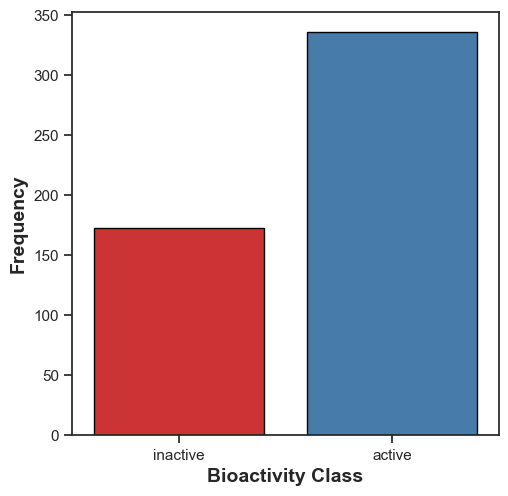

In [20]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x='activity_comment', data=df_combined, edgecolor='black', palette='Set1')
plt.xlabel('Bioactivity Class', fontsize= 14, fontweight ='bold')
plt.ylabel('Frequency', fontsize= 14, fontweight ='bold')
plt.savefig('plot_bioactivity_class.pdf')

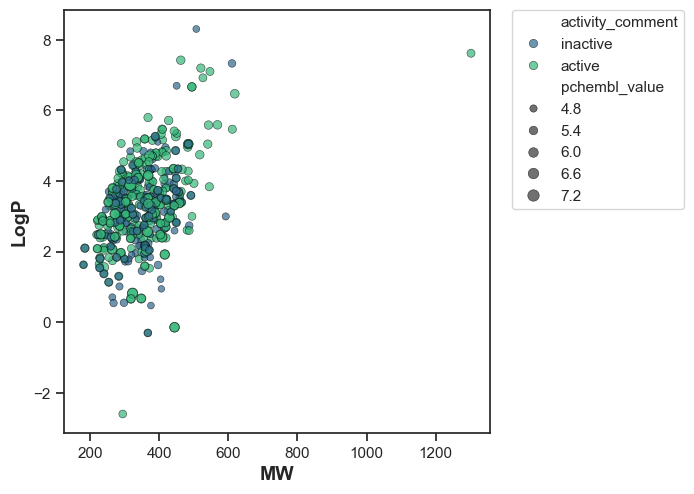

In [22]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(x='MW', y='LogP', data=df_combined, hue='activity_comment', size='pchembl_value', edgecolor='black', alpha=0.7, palette='viridis')
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot2.pdf')

C:\Users\saman\AppData\Local\Temp\ipykernel_11692\3683438914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity_comment', y='pchembl_value', data=df_combined, palette='viridis')


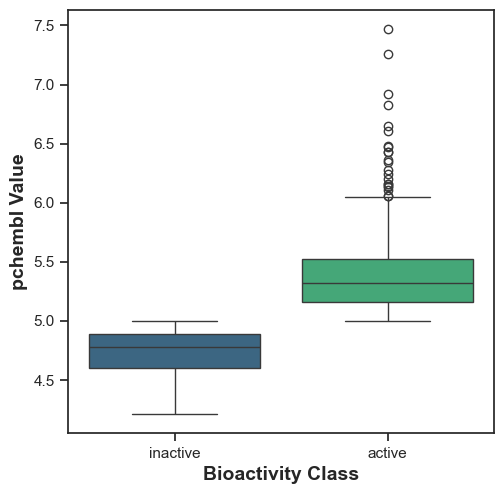

In [21]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='activity_comment', y='pchembl_value', data=df_combined, palette='viridis')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pchembl Value', fontsize=14, fontweight='bold')
plt.savefig('plot3.pdf')

Statistical Analysis| Mann-Whitney U test
The Mann Whitney U test is a non-parametric statistical test used to compare two independant groups 
It is done when:
1. the data is not normallyt distributed 
2. the sample sizes are small and may not meet normality assumptions
3. The data is ordinal or continuous but does not necessarily follow a normal distribution

In [ ]:
import pandas as pd
from numpy.random import seed
from scipy.stats import mannwhitneyu

def manwhitney(descriptor, df_combined, verbose=False):
    # Ensure df_combined is provided
    if descriptor not in df_combined.columns:
        print(f"Descriptor '{descriptor}' not found in dataframe.")
        return None #Before proceeding, the function ensures that the provided descriptor name exists in df_combined.

    # Extract active and inactive subsets
    selection = [descriptor, 'activity_comment'] # descriptor: the numerical descriptor to be used for the Mann-Whitney U test and activity_comment: the bioactivity class
    df = df_combined[selection]
    
    active = df[df.activity_comment == 'active'][descriptor]
    inactive = df[df.activity_comment == 'inactive'][descriptor]

    # Check for empty groups
    if active.empty or inactive.empty:
        print(f"No data available for {descriptor}. Skipping.")
        return None

    # Perform Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive) #stat: the computed U statistic and p: the p-value of the test
    
    # Interpret results
    alpha = 0.05 #if p is less than alpha, the null hypothesis is rejected and the two groups are considered to have significantly different distributions
    interpretation = 'Same distribution (fail to reject H0)' if p > alpha else 'Different distribution (reject H0)'

    # Store results in DataFrame
    results = pd.DataFrame({'Descriptor': [descriptor],
                            'Statistics': [stat],
                            'p': [p],
                            'alpha': [alpha],
                            'Interpretation': [interpretation]})

    # Save results to CSV
    result_file = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(result_file, index=False)
    
    print(f"Results saved to {result_file}")
    
    return results


In [27]:
result = manwhitney("MW", df_combined)
print(result)


Results saved to mannwhitneyu_MW.csv
  Descriptor  Statistics         p  alpha  \
0         MW     30828.0  0.261866   0.05   

                          Interpretation  
0  Same distribution (fail to reject H0)  


In [32]:
manwhitney('pchembl_value', df_combined)

Results saved to mannwhitneyu_pchembl_value.csv


,Descriptor,Statistics,p,alpha,Interpretation
0,pchembl_value,58123.5,2.526982e-76,0.05,Different distribution (reject H0)


C:\Users\saman\AppData\Local\Temp\ipykernel_11692\1386569703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity_comment', y='MW', data=df_combined, palette='viridis')


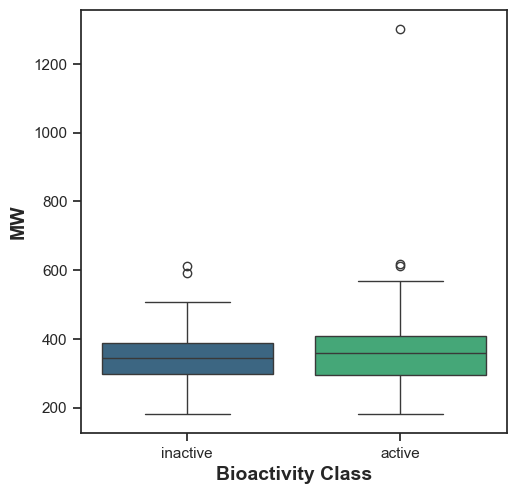

In [34]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='activity_comment', y='MW', data=df_combined, palette='viridis')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')    
plt.savefig('MW1.pdf')

In [36]:
manwhitney('MW', df_combined)

Results saved to mannwhitneyu_MW.csv


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,30828.0,0.261866,0.05,Same distribution (fail to reject H0)


C:\Users\saman\AppData\Local\Temp\ipykernel_11692\3045556442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity_comment', y='LogP', data=df_combined, palette='viridis')


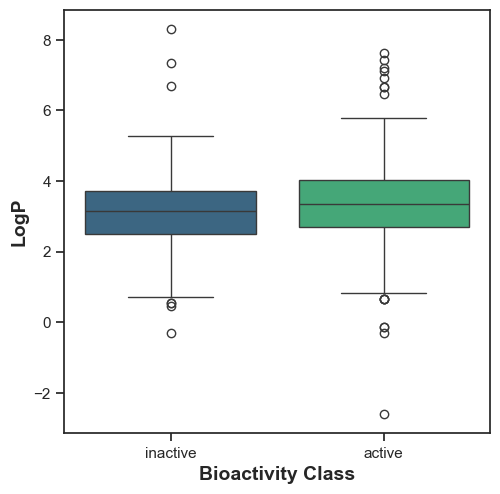

In [38]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='activity_comment', y='LogP', data=df_combined, palette='viridis')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold') 
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('LogP1.pdf')

In [39]:
manwhitney('LogP', df_combined)

Results saved to mannwhitneyu_LogP.csv


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,32620.0,0.02369,0.05,Different distribution (reject H0)


C:\Users\saman\AppData\Local\Temp\ipykernel_11692\3544534521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity_comment', y='NumHDonors', data=df_combined, palette='viridis')


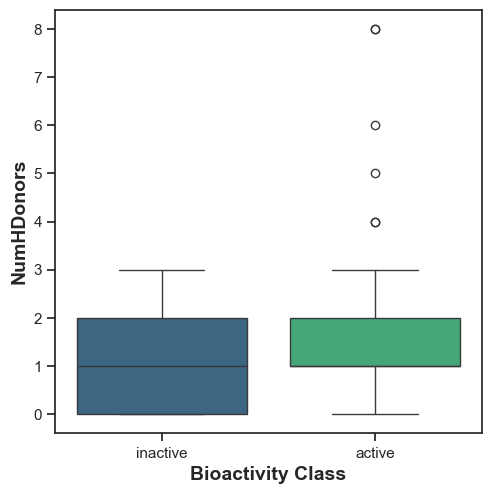

In [40]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='activity_comment', y='NumHDonors', data=df_combined, palette='viridis')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('NumHDonors1.pdf')

In [41]:
manwhitney('NumHDonors', df_combined)

Results saved to mannwhitneyu_NumHDonors.csv


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,33122.0,0.004882,0.05,Different distribution (reject H0)


C:\Users\saman\AppData\Local\Temp\ipykernel_11692\4137022802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='activity_comment', y='NumHAcceptors', data=df_combined, palette='viridis')


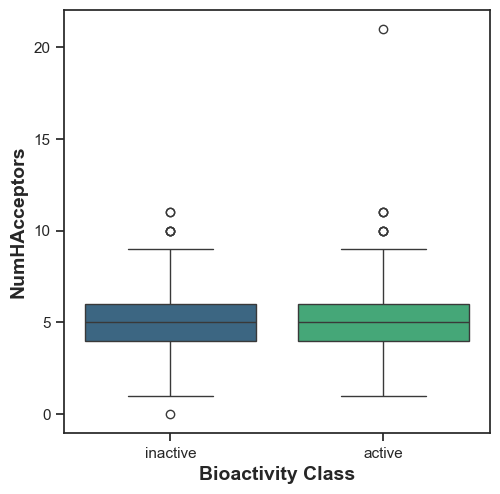

In [42]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='activity_comment', y='NumHAcceptors', data=df_combined, palette='viridis')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold') 
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.savefig('NumHAcceptors1.pdf')

In [44]:
manwhitney('NumHAcceptors', df_combined)

Results saved to mannwhitneyu_NumHAcceptors.csv


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,29480.5,0.787673,0.05,Same distribution (fail to reject H0)


Interpretation of Mann-Whitney U Test Results
Since NumHacceptors and MW show the same distribution (i.e., non-significant p-value), but numHdonor and LogP show a different distribution (i.e., significant p-value), this suggests that:

1. NumHacceptors and MW (Molecular Weight)
The lack of significant difference means that these two properties are similarly distributed between the two groups.
This could indicate that MW and the number of hydrogen bond acceptors are not key distinguishing features between the groups.
In the context of drug-like molecules, MW and hydrogen bond acceptors might not play a dominant role in differentiating active vs. inactive compounds or diseased vs. healthy samples.
2. NumHdonors and LogP
A significant difference suggests that these features are key differentiating factors between the two groups.
NumHdonors (Hydrogen Donors): If significantly different, it could mean that one group has molecules with more or fewer hydrogen donors, impacting solubility and binding interactions.
LogP (Lipophilicity/Partition Coefficient): A difference in LogP indicates that one group consists of more hydrophobic or hydrophilic compounds, which can affect absorption, permeability, and bioavailability.
Biological Implications (Hypothesis)
If this is related to bioactive compounds, it might suggest that lipophilicity and hydrogen bonding capabilities (donors) play a stronger role in biological activity than MW and acceptors.
If analyzing a disease vs. control dataset, it suggests that LogP and hydrogen donors are more affected in the disease state.